# Artificial Intelligence for Trading (Lab Lecture 2)
**Contacts: novella@di.uniroma1.it, coletta@di.uniroma1.it, piva@di.uniroma1.it, prata@di.uniroma1.it**

## Recap of previous Lab Lecture

You have seen examples of data from real stock market dataset (e.g., https://finance.yahoo.com).

In particular, **you studied <"Open" "High" "Low" "Close"> data format, namely OHLC format**.
They will look like the picture below (**AAPL.csv**).

<img src="data/press_images/AAPL_table.png" width="600" height="700"/>
<br>
They have usually have limit granularity (1 day in the picture above), for more accurate data, other kind of data source and structure are often used.

## Orderbook data
The ordebook data (sell, buy, history) allows us to access each single trade.

In particular we have the history:

<img src="data/lab2/orderbook_hist.png" width="600" height="700"/>
<br>
Which allows us to re-build the prices of a period.

And we have the orderbook view, which allows us to understand and study more trends and perform deep technical analysis:

<img src="data/lab2/orderbook_struct.png" width="600" height="700"/>

## Orderbook Technical Analysis

There are several techniques, and statistical tools, to analyse the orderbook and extract insights.

For example, a simple trader can observe the below pattern in the orderbook to
understand that **the stock price will probably increase** (a lot of people want to buy stocks):

<img src="data/lab2/orderbook_tec_buy.png" width="600" height="700"/>
<br>
Similarly, in the picture below **a trader can see a possible negative trend**, due to high number of sell orders:

<img src="data/lab2/orderbook_tec_sell.png" width="600" height="700"/>

## Collect Orderbook data

Usually **ordebook data are not public available**. They are expensive, and often provide only by the exchanges, like NASDAQ or NYSE.

Trade companies or Banks use them to test their algorithms (back-testing) or to study correlation,
phenomena, crashes and so on.


For research we can use **LOBSTER data**, site: https://lobsterdata.com/.
LOBSTER is an online limit order book data tool to provide easy-to-use, high-quality limit order book data (from NASDAQ).

**Customized level of detail.**
Select from up to 200 price levels available depending on the level of detail required for your research - whether 'trades and quotes', i.e. level 1, level 10 or level 20.

**Latest data**.
The database contains data from the 27th of June 2007 up to the day before yesterday.

**Detailed event information.**
Submissions, cancellations and executions (visible and hidden) are uniquely identified. For each limit order event in the requested price range the following details are included: Time stamp (up to nanosecond precision), order ID, price, size and buy/sell indicator.

**Free access to samples of data:**
From the web-site: https://lobsterdata.com/info/DataSamples.php you can download some samples of data for the homework and for testing your scripts.
During the project, we will provide you the needed data.

## LOBSTER data

**Amazon data for 2012-06-21:**

`AMZN_2012-06-21_34200000_57600000_message_5.csv`
<br>
`AMZN_2012-06-21_34200000_57600000_orderbook_5.csv`
<br>
`LOBSTER_SampleFiles_ReadMe.txt`

In [38]:
import pandas as pd

messages = pd.read_csv("data/lab2/amz/AMZN_2012-06-21_34200000_57600000_message_1.csv")
orderbook = pd.read_csv("data/lab2/amz/AMZN_2012-06-21_34200000_57600000_orderbook_1.csv")

print("History messages")
print(messages)
print("Orderbook")
print(orderbook)

FileNotFoundError: [Errno 2] No such file or directory: 'data/lab2/amz/AMZN_2012-06-21_34200000_57600000_message_5.csv'

In [40]:
# take from readme the description of columns
COLUMNS_NAMES = {"orderbook": ["sell", "vsell", "buy", "vbuy"],
                 "message": ["time", "event_type", "order_id", "size", "price", "direction"]}

messages = pd.read_csv("data/lab2/amz/AMZN_2012-06-21_34200000_57600000_message_1.csv", names=COLUMNS_NAMES["message"])
orderbook = pd.read_csv("data/lab2/amz/AMZN_2012-06-21_34200000_57600000_orderbook_1.csv", names=COLUMNS_NAMES["orderbook"])


print("History messages")
print(messages)

History messages
               time  event_type   order_id  size    price  direction
0      34200.017460           5          0     1  2238200         -1
1      34200.189608           1   11885113    21  2238100          1
2      34200.190226           4   11885113    21  2238100          1
3      34200.190226           4   11534792    26  2237500          1
4      34200.372780           5          0   100  2238400         -1
...             ...         ...        ...   ...      ...        ...
57510  57599.545828           4  282917222     9  2205100          1
57511  57599.545828           4  286916542    51  2205100          1
57512  57599.903989           3  287142900   100  2206200         -1
57513  57599.958245           1  287174077   100  2206300         -1
57514  57599.959360           3  287174077   100  2206300         -1

[57515 rows x 6 columns]
Orderbook
          sell  vsell      buy  vbuy
0      2239500    100  2231800   100
1      2239500    100  2238100    21
2      2

## Messages
<img src="data/lab2/message_mes_info.png" width="900" height="700"/>
<br>

In [ ]:
print("Orderbook")
print(orderbook)

## Orderbook
<img src="data/lab2/lobster_order_info.png" width="900" height="700"/>


In [45]:
#merge data to combine orderbook with time and messages
all_lob_data = messages.copy()
all_lob_data[COLUMNS_NAMES["orderbook"]] = orderbook
print(all_lob_data)

               time  event_type   order_id  size    price  direction     sell  vsell      buy  vbuy
0      34200.017460           5          0     1  2238200         -1  2239500    100  2231800   100
1      34200.189608           1   11885113    21  2238100          1  2239500    100  2238100    21
2      34200.190226           4   11885113    21  2238100          1  2239500    100  2237500   100
3      34200.190226           4   11534792    26  2237500          1  2239500    100  2237500    74
4      34200.372780           5          0   100  2238400         -1  2239500    100  2237500    74
...             ...         ...        ...   ...      ...        ...      ...    ...      ...   ...
57510  57599.545828           4  282917222     9  2205100          1  2206200    100  2205100   300
57511  57599.545828           4  286916542    51  2205100          1  2206200    100  2205100   249
57512  57599.903989           3  287142900   100  2206200         -1  2206400    100  2205100   249


In [59]:
from datetime import datetime, timedelta

def add_readble_time(start_date, df):
    """ change index of dataframe. """
    df = df.copy()
    df.insert(0, "date", [start_date + timedelta(seconds=i) for i in df["time"]])
    return df

start_date = datetime.strptime("21.06.2012", "%d.%m.%Y")
lob_data_w_date = add_readble_time(start_date, all_lob_data)
print(lob_data_w_date)

                            date          time  event_type   order_id  size    price  direction     sell  vsell      buy  vbuy
5000  2012-06-21 09:59:20.882480  35960.882480           3   45998668    19  2243700         -1  2244100     16  2241800    19
5001  2012-06-21 09:59:20.883326  35960.883326           3   45998662    16  2244100         -1  2244400    335  2241800    19
5002  2012-06-21 09:59:25.602614  35965.602614           1   46059567     5  2244400         -1  2244400    340  2241800    19
5003  2012-06-21 09:59:27.300591  35967.300591           3   45989742    19  2241800          1  2244400    340  2241700    16
5004  2012-06-21 09:59:27.303374  35967.303374           1   46084534    16  2243700         -1  2243700     16  2241700    16
...                          ...           ...         ...        ...   ...      ...        ...      ...    ...      ...   ...
57510 2012-06-21 15:59:59.545828  57599.545828           4  282917222     9  2205100          1  2206200    100

## Mid prices
How we can print mid-prices using these data?

Remember the definition of mid-prices:
  $mid\_price(t) = \frac{best\_bid(t) \ + \ best\_ask(t)}{2}$

<img src="data/lab2/mid_price.png" width="900" height="700"/>


In [51]:
# Compute the mid-price
mid_price_df = lob_data_w_date
mid_price_df.index = mid_price_df["date"]
out_df = mid_price_df[["sell", "buy"]].resample("1s").agg({"sell" : 'min', "buy" : 'max'})
out_df["mid_price"] = (out_df["sell"] + out_df["buy"]) / 2
print(out_df)

                          sell        buy  mid_price
date                                                
2012-06-21 09:30:00  2239500.0  2238400.0  2238950.0
2012-06-21 09:30:01  2238600.0  2238400.0  2238500.0
2012-06-21 09:30:02  2242400.0  2238900.0  2240650.0
2012-06-21 09:30:03  2242000.0  2238900.0  2240450.0
2012-06-21 09:30:04  2241000.0  2238900.0  2239950.0
...                        ...        ...        ...
2012-06-21 15:59:55  2206000.0  2206000.0  2206000.0
2012-06-21 15:59:56  2206200.0  2205900.0  2206050.0
2012-06-21 15:59:57  2206300.0  2206000.0  2206150.0
2012-06-21 15:59:58  2206300.0  2206000.0  2206150.0
2012-06-21 15:59:59  2205300.0  2205300.0  2205300.0

[23400 rows x 3 columns]


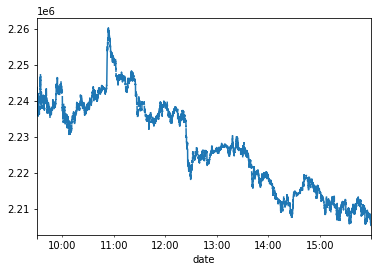

In [52]:
# Plot mid-price
from matplotlib import pyplot as plt

out_df["mid_price"].plot()
plt.show()


## Price chart
The mid-price is not exactly the chart price that you see on yahoo, google finance and so on.
<br> Assume that a stock is usually traded at $20\$$, and for some strange reasons one day it has zero trades, only one bid and one ask.
<br> One bid at $1000$ and one ask at $10$, you can say that the price is $505$? False.

You have to use the **actual trades** messages.


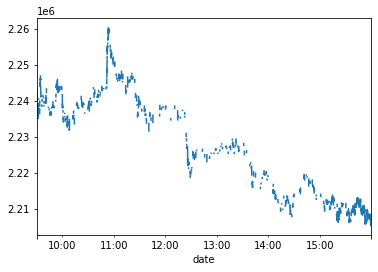

In [54]:
# Compute the actual price along the day

# use only executed orders::
#OrderEvent.EXECUTION,
#OrderEvent.HIDDEN_EXECUTION
df_m_executed = lob_data_w_date[(lob_data_w_date["event_type"].isin([4,5]))]
df_m_executed.index = df_m_executed["date"]
out_df_price = df_m_executed[["price"]].resample("1s").first()

print(out_df_price)
out_df_price["price"].plot()
plt.show()


                            date          time  event_type   order_id  size    price  direction     sell  vsell      buy  vbuy
5000  2012-06-21 09:59:20.882480  35960.882480           3   45998668    19  2243700         -1  2244100     16  2241800    19
5001  2012-06-21 09:59:20.883326  35960.883326           3   45998662    16  2244100         -1  2244400    335  2241800    19
5002  2012-06-21 09:59:25.602614  35965.602614           1   46059567     5  2244400         -1  2244400    340  2241800    19
5003  2012-06-21 09:59:27.300591  35967.300591           3   45989742    19  2241800          1  2244400    340  2241700    16
5004  2012-06-21 09:59:27.303374  35967.303374           1   46084534    16  2243700         -1  2243700     16  2241700    16
...                          ...           ...         ...        ...   ...      ...        ...      ...    ...      ...   ...
57510 2012-06-21 15:59:59.545828  57599.545828           4  282917222     9  2205100          1  2206200    100

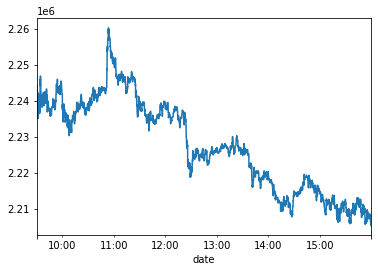

In [60]:
print(lob_data_w_date[5000:])

# fill empty holes
out_df_price["price"] = out_df_price["price"].fillna(method="ffill")
out_df_price["price"].plot()
plt.show()


This notebook and more is available for download at: https://github.com/matteoprata/AI4Trading_20_21